In [34]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

#import more packages
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [35]:
#load data
df = pd.read_csv('NORAM_HIED_UPSELL_LOG_REG_1.csv',encoding='latin-1')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ï»¿Account Name                          7576 non-null   object 
 1   Account ID 18                            7576 non-null   object 
 2   Opportunity Name                         7576 non-null   object 
 3   Opportunity ID 18                        7576 non-null   object 
 4   Stage (1=Closed Won, 0=Closed Lost)      7576 non-null   int64  
 5   Account FTE/Users                        6653 non-null   float64
 6   FTE <1,000                               7576 non-null   int64  
 7   FTE 1,000-5,000                          7576 non-null   int64  
 8   FTE 5,000-10,000                         7576 non-null   int64  
 9   FTE >10,000                              7576 non-null   int64  
 10  Fiscal Quarter                           7576 no

In [37]:
#identify null variables
df.isnull().sum()

ï»¿Account Name                               0
Account ID 18                                 0
Opportunity Name                              0
Opportunity ID 18                             0
Stage (1=Closed Won, 0=Closed Lost)           0
Account FTE/Users                           923
FTE <1,000                                    0
FTE 1,000-5,000                               0
FTE 5,000-10,000                              0
FTE >10,000                                   0
Fiscal Quarter                                0
Fiscal Year                                   0
Sales Owner: Regional Director                0
Sales Owner: Account Executive                0
Age                                           0
Gap between Close Date and Go Live Date    4153
Lead Source                                3619
Lead Source: Chat                             0
Lead Source: Cold Call                        0
Lead Source: CX Generated                     0
Lead Source: CSM Generated              

array([[<AxesSubplot:title={'center':'Stage (1=Closed Won, 0=Closed Lost)'}>,
        <AxesSubplot:title={'center':'Account FTE/Users'}>,
        <AxesSubplot:title={'center':'FTE <1,000'}>,
        <AxesSubplot:title={'center':'FTE 1,000-5,000'}>,
        <AxesSubplot:title={'center':'FTE 5,000-10,000'}>,
        <AxesSubplot:title={'center':'FTE >10,000'}>],
       [<AxesSubplot:title={'center':'Fiscal Year'}>,
        <AxesSubplot:title={'center':'Sales Owner: Regional Director'}>,
        <AxesSubplot:title={'center':'Sales Owner: Account Executive'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gap between Close Date and Go Live Date'}>,
        <AxesSubplot:title={'center':'Lead Source: Chat'}>],
       [<AxesSubplot:title={'center':'Lead Source: Cold Call'}>,
        <AxesSubplot:title={'center':'Lead Source: CX Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: CSM Generated'}>,
        <AxesSubplot:title={'center':'Lead Sou

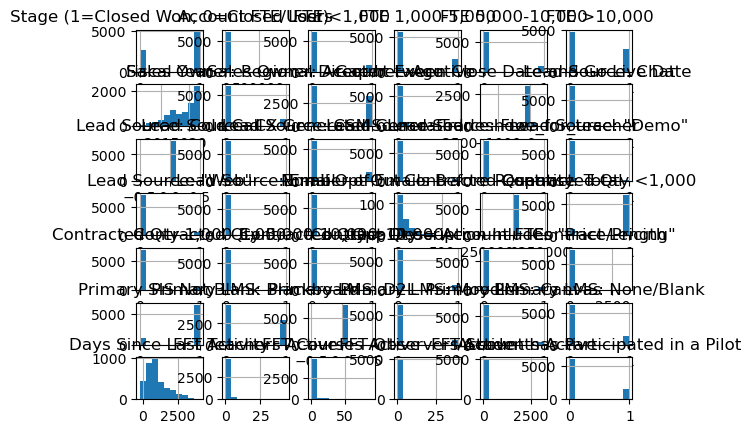

In [38]:
df.hist()

In [39]:
#drop complicating variables
df= df.drop(['Number of Emails Before Response'], axis=1)
df= df.drop(['Gap between Close Date and Go Live Date'], axis=1)
df= df.drop(['Lead Source'], axis=1)
df= df.drop(['ï»¿Account Name'], axis=1)
df= df.drop(['Opportunity Name'], axis=1)
df= df.drop(['Account ID 18'], axis=1)
df= df.drop(['Opportunity ID 18'], axis=1)
df= df.drop(['Contact: Title'], axis=1)
df= df.drop(['Implementation Package'], axis=1)
df= df.drop(['Primary LMS'], axis=1)
df= df.drop(['Primary SIS'], axis=1)
df= df.drop(['Org Type'], axis=1)
df= df.drop(['Customer Success Region'], axis=1)
df= df.drop(['Email Opt Out'], axis=1)
df= df.drop(['Type'], axis=1)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      7576 non-null   int64  
 1   Account FTE/Users                        6653 non-null   float64
 2   FTE <1,000                               7576 non-null   int64  
 3   FTE 1,000-5,000                          7576 non-null   int64  
 4   FTE 5,000-10,000                         7576 non-null   int64  
 5   FTE >10,000                              7576 non-null   int64  
 6   Fiscal Quarter                           7576 non-null   object 
 7   Fiscal Year                              7576 non-null   int64  
 8   Sales Owner: Regional Director           7576 non-null   int64  
 9   Sales Owner: Account Executive           7576 non-null   int64  
 10  Age                                      7576 no

<AxesSubplot:>

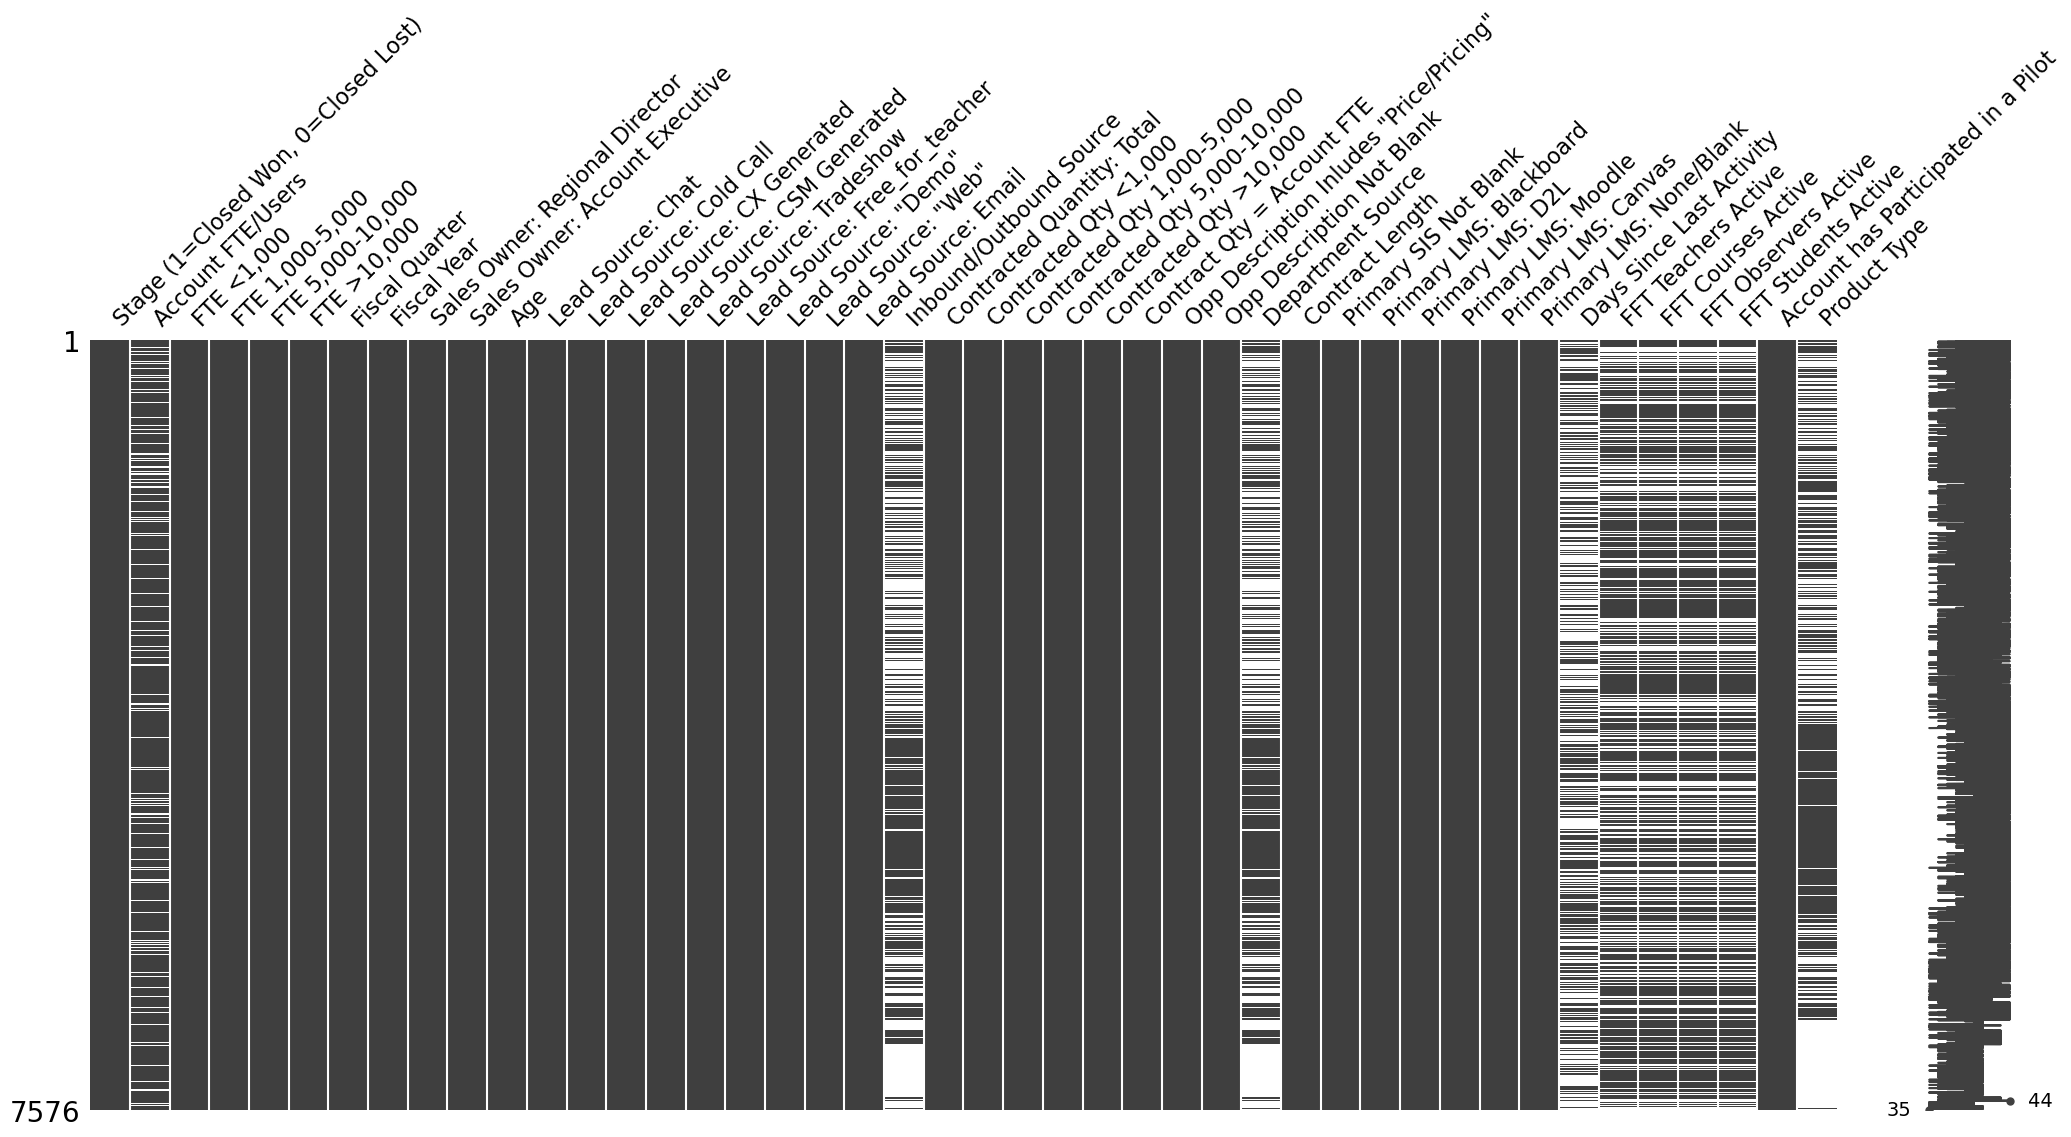

In [41]:
import missingno as msno
msno.matrix(df)

In [42]:
#verify there are no null values
df.isnull().sum()

Stage (1=Closed Won, 0=Closed Lost)           0
Account FTE/Users                           923
FTE <1,000                                    0
FTE 1,000-5,000                               0
FTE 5,000-10,000                              0
FTE >10,000                                   0
Fiscal Quarter                                0
Fiscal Year                                   0
Sales Owner: Regional Director                0
Sales Owner: Account Executive                0
Age                                           0
Lead Source: Chat                             0
Lead Source: Cold Call                        0
Lead Source: CX Generated                     0
Lead Source: CSM Generated                    0
Lead Source: Tradeshow                        0
Lead Source: Free_for_teacher                 0
Lead Source: "Demo"                           0
Lead Source: "Web"                            0
Lead Source: Email                            0
Inbound/Outbound Source                 

In [43]:
#perform imputation for nulls (If there is symmetry in the dataset, use the mean. If the dataset is skewed use the median. Use the mode with qualitative variables.)
df['Account FTE/Users'].fillna(df['Account FTE/Users'].mean(), inplace=True)
df['Department Source'].fillna(df['Department Source'].mode()[0], inplace=True)
df['Product Type'].fillna(df['Product Type'].mode()[0], inplace=True)
df['Inbound/Outbound Source'].fillna(df['Inbound/Outbound Source'].mode()[0], inplace=True)
df['Days Since Last Activity'].fillna(df['Days Since Last Activity'].mean(), inplace=True)
df['FFT Teachers Active'].fillna(df['FFT Teachers Active'].median(), inplace=True)
df['FFT Students Active'].fillna(df['FFT Students Active'].median(), inplace=True)
df['FFT Observers Active'].fillna(df['FFT Observers Active'].median(), inplace=True)
df['FFT Courses Active'].fillna(df['FFT Courses Active'].median(), inplace=True)

array([[<AxesSubplot:title={'center':'Stage (1=Closed Won, 0=Closed Lost)'}>,
        <AxesSubplot:title={'center':'Account FTE/Users'}>,
        <AxesSubplot:title={'center':'FTE <1,000'}>,
        <AxesSubplot:title={'center':'FTE 1,000-5,000'}>,
        <AxesSubplot:title={'center':'FTE 5,000-10,000'}>,
        <AxesSubplot:title={'center':'FTE >10,000'}>],
       [<AxesSubplot:title={'center':'Fiscal Year'}>,
        <AxesSubplot:title={'center':'Sales Owner: Regional Director'}>,
        <AxesSubplot:title={'center':'Sales Owner: Account Executive'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Lead Source: Chat'}>,
        <AxesSubplot:title={'center':'Lead Source: Cold Call'}>],
       [<AxesSubplot:title={'center':'Lead Source: CX Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: CSM Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: Tradeshow'}>,
        <AxesSubplot:title={'center':'Lead Source: Free_for_tea

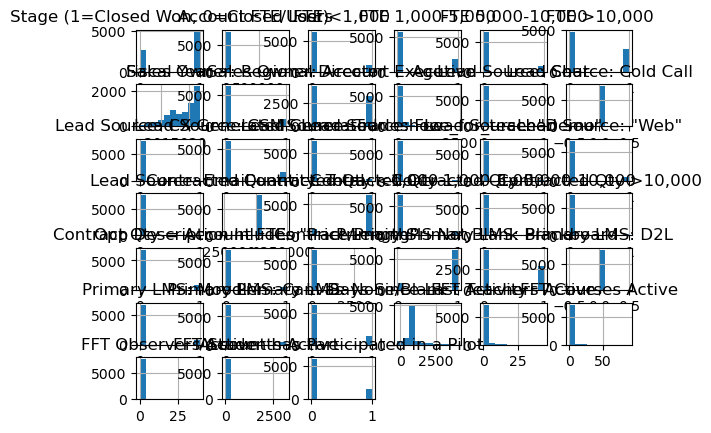

In [44]:
#verify the distribution after imputation
df.hist()

array([[<AxesSubplot:title={'center':'Stage (1=Closed Won, 0=Closed Lost)'}>,
        <AxesSubplot:title={'center':'Account FTE/Users'}>,
        <AxesSubplot:title={'center':'FTE <1,000'}>,
        <AxesSubplot:title={'center':'FTE 1,000-5,000'}>,
        <AxesSubplot:title={'center':'FTE 5,000-10,000'}>,
        <AxesSubplot:title={'center':'FTE >10,000'}>],
       [<AxesSubplot:title={'center':'Fiscal Year'}>,
        <AxesSubplot:title={'center':'Sales Owner: Regional Director'}>,
        <AxesSubplot:title={'center':'Sales Owner: Account Executive'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Lead Source: Chat'}>,
        <AxesSubplot:title={'center':'Lead Source: Cold Call'}>],
       [<AxesSubplot:title={'center':'Lead Source: CX Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: CSM Generated'}>,
        <AxesSubplot:title={'center':'Lead Source: Tradeshow'}>,
        <AxesSubplot:title={'center':'Lead Source: Free_for_tea

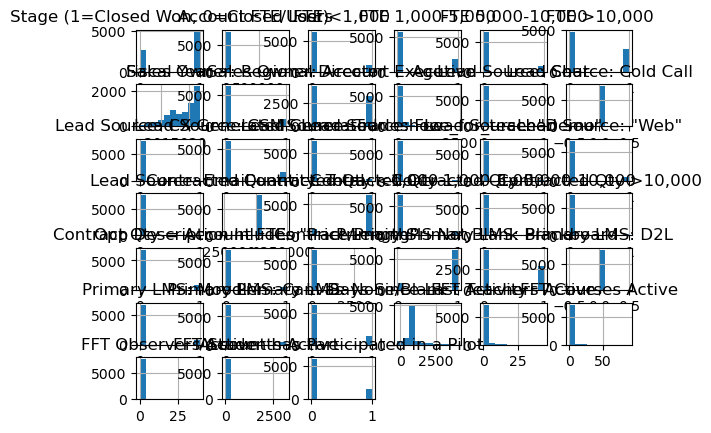

In [45]:
#verify the distribution after imputation
df.hist()

<AxesSubplot:>

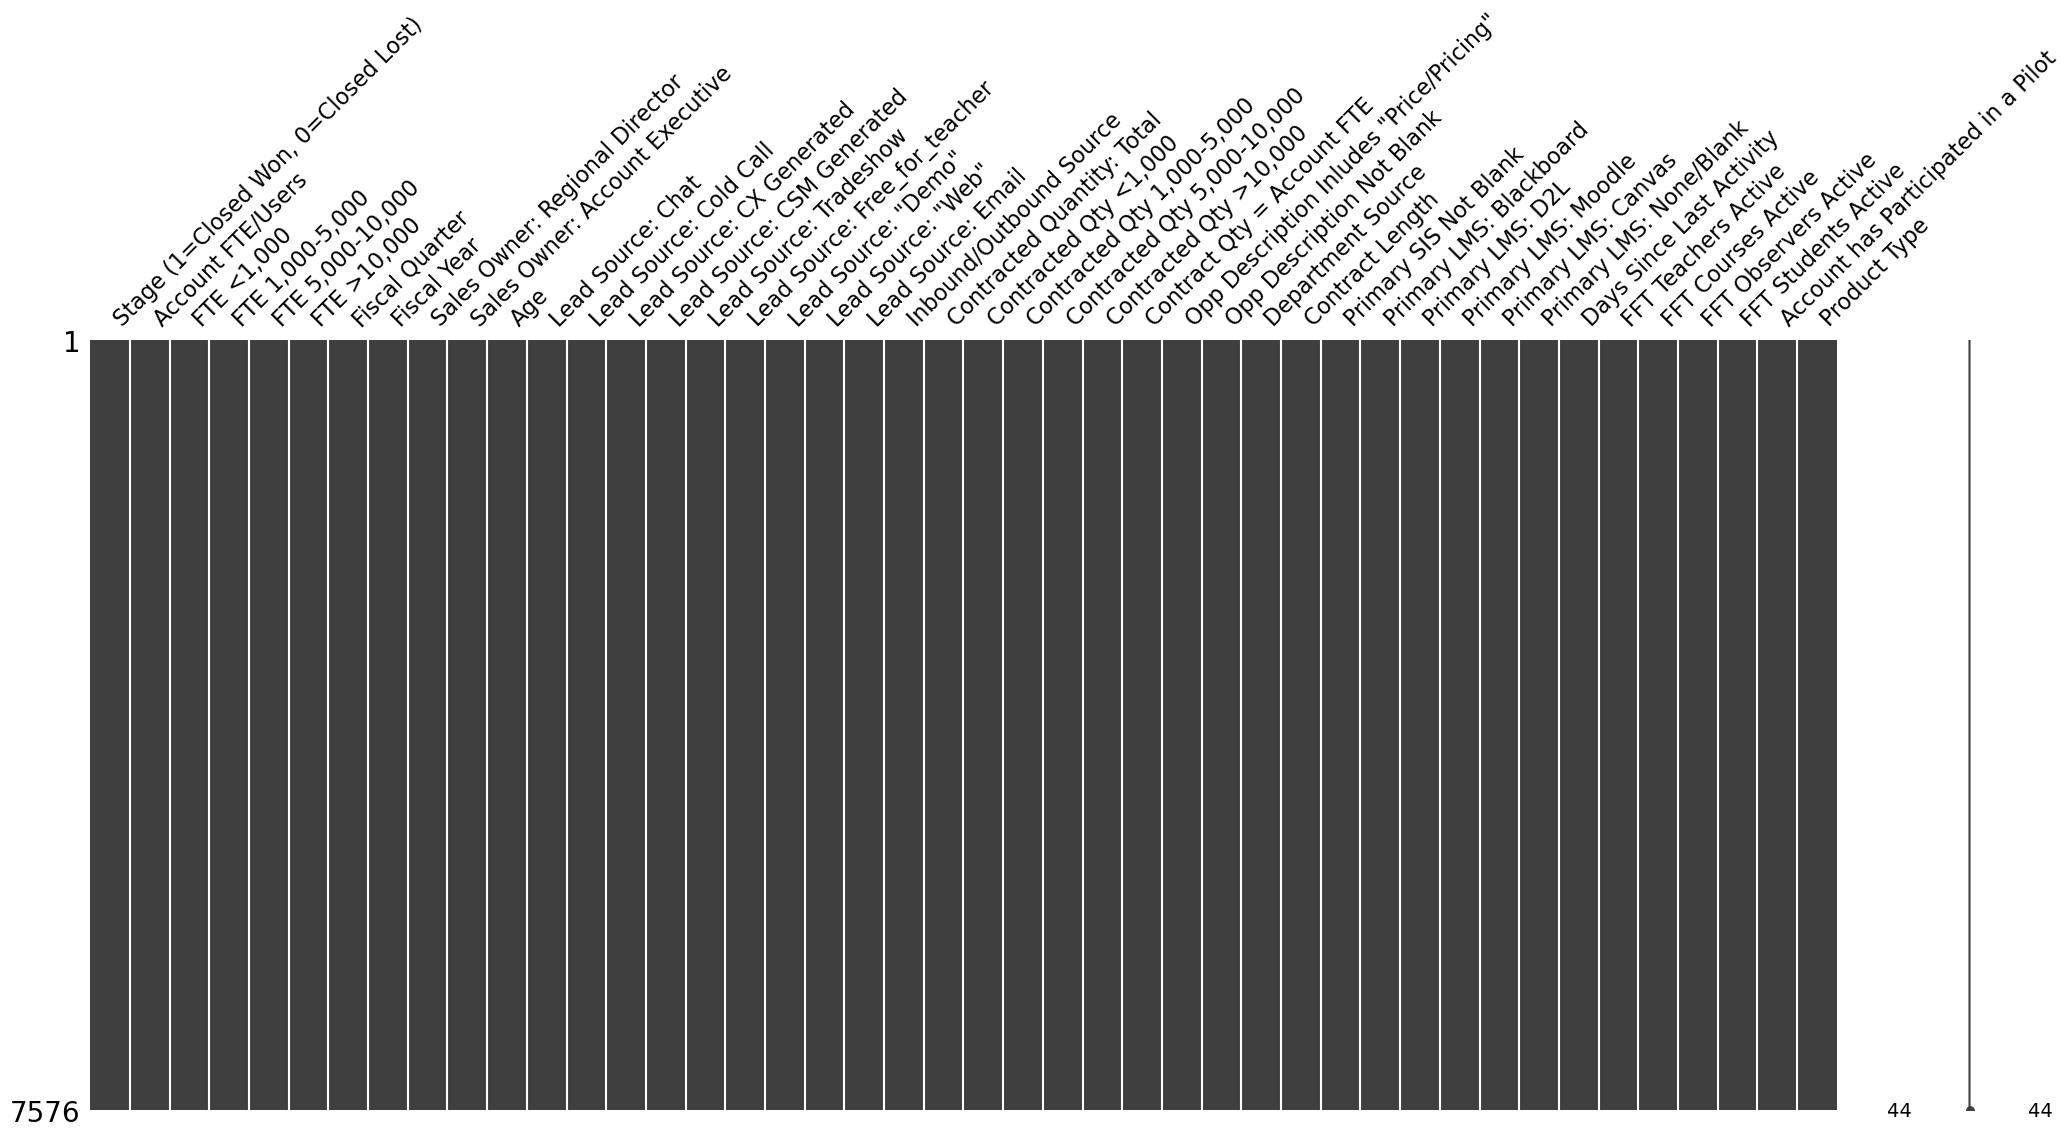

In [46]:
import missingno as msno
msno.matrix(df)

In [47]:
#verify there are no null values
df.isnull().sum()


Stage (1=Closed Won, 0=Closed Lost)        0
Account FTE/Users                          0
FTE <1,000                                 0
FTE 1,000-5,000                            0
FTE 5,000-10,000                           0
FTE >10,000                                0
Fiscal Quarter                             0
Fiscal Year                                0
Sales Owner: Regional Director             0
Sales Owner: Account Executive             0
Age                                        0
Lead Source: Chat                          0
Lead Source: Cold Call                     0
Lead Source: CX Generated                  0
Lead Source: CSM Generated                 0
Lead Source: Tradeshow                     0
Lead Source: Free_for_teacher              0
Lead Source: "Demo"                        0
Lead Source: "Web"                         0
Lead Source: Email                         0
Inbound/Outbound Source                    0
Contracted Quantity: Total                 0
Contracted

In [48]:
df.dtypes

Stage (1=Closed Won, 0=Closed Lost)          int64
Account FTE/Users                          float64
FTE <1,000                                   int64
FTE 1,000-5,000                              int64
FTE 5,000-10,000                             int64
FTE >10,000                                  int64
Fiscal Quarter                              object
Fiscal Year                                  int64
Sales Owner: Regional Director               int64
Sales Owner: Account Executive               int64
Age                                          int64
Lead Source: Chat                            int64
Lead Source: Cold Call                       int64
Lead Source: CX Generated                    int64
Lead Source: CSM Generated                   int64
Lead Source: Tradeshow                       int64
Lead Source: Free_for_teacher                int64
Lead Source: "Demo"                          int64
Lead Source: "Web"                           int64
Lead Source: Email             

In [49]:
# create dummy variables 
dummies= pd.get_dummies(df[["Fiscal Quarter","Inbound/Outbound Source","Department Source","Product Type"]])
df = pd.concat([df, dummies], axis=1)

In [50]:
#drop original dummy variables
df = df.drop(['Fiscal Quarter'], axis=1)
df = df.drop(['Inbound/Outbound Source'], axis=1)
df = df.drop(['Department Source'], axis=1)
df = df.drop(['Product Type'], axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 65 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      7576 non-null   int64  
 1   Account FTE/Users                        7576 non-null   float64
 2   FTE <1,000                               7576 non-null   int64  
 3   FTE 1,000-5,000                          7576 non-null   int64  
 4   FTE 5,000-10,000                         7576 non-null   int64  
 5   FTE >10,000                              7576 non-null   int64  
 6   Fiscal Year                              7576 non-null   int64  
 7   Sales Owner: Regional Director           7576 non-null   int64  
 8   Sales Owner: Account Executive           7576 non-null   int64  
 9   Age                                      7576 non-null   int64  
 10  Lead Source: Chat                        7576 no

In [52]:
#drop k-1 dummy variables
df = df.drop(['Department Source_Partner Generated'], axis=1)
df = df.drop(['Product Type_Subscription Add-ons'], axis=1)
df = df.drop(['Opp Description Not Blank'], axis=1)
df = df.drop(['Fiscal Quarter_Q1'], axis=1)
df = df.drop(['Fiscal Year'], axis=1)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      7576 non-null   int64  
 1   Account FTE/Users                        7576 non-null   float64
 2   FTE <1,000                               7576 non-null   int64  
 3   FTE 1,000-5,000                          7576 non-null   int64  
 4   FTE 5,000-10,000                         7576 non-null   int64  
 5   FTE >10,000                              7576 non-null   int64  
 6   Sales Owner: Regional Director           7576 non-null   int64  
 7   Sales Owner: Account Executive           7576 non-null   int64  
 8   Age                                      7576 non-null   int64  
 9   Lead Source: Chat                        7576 non-null   int64  
 10  Lead Source: Cold Call                   7576 no

In [54]:
# transform variables
df['Fiscal Quarter_Q2'] = df['Fiscal Quarter_Q2'].astype(float)
df['Fiscal Quarter_Q3'] = df['Fiscal Quarter_Q3'].astype(float)
df['Fiscal Quarter_Q4'] = df['Fiscal Quarter_Q4'].astype(float)
df['Inbound/Outbound Source_Outbound'] = df['Inbound/Outbound Source_Outbound'].astype(float)
df['Department Source_CS Generated'] = df['Department Source_CS Generated'].astype(float)
df['Department Source_CX Generated'] = df['Department Source_CX Generated'].astype(float)
df['Department Source_Channel Generated'] = df['Department Source_Channel Generated'].astype(float)
df['Department Source_Marketing Generated'] = df['Department Source_Marketing Generated'].astype(float)
df['Department Source_Sales Generated'] = df['Department Source_Sales Generated'].astype(float)
df['Product Type_Cloud SaaS Subscription'] = df['Product Type_Cloud SaaS Subscription'].astype(float)
df['Product Type_Custom Development'] = df['Product Type_Custom Development'].astype(float)
df['Product Type_Implementation'] = df['Product Type_Implementation'].astype(float)
df['Product Type_Pilot'] = df['Product Type_Pilot'].astype(float)
df['Product Type_Support'] = df['Product Type_Support'].astype(float)
df['Product Type_Training'] = df['Product Type_Training'].astype(float)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      7576 non-null   int64  
 1   Account FTE/Users                        7576 non-null   float64
 2   FTE <1,000                               7576 non-null   int64  
 3   FTE 1,000-5,000                          7576 non-null   int64  
 4   FTE 5,000-10,000                         7576 non-null   int64  
 5   FTE >10,000                              7576 non-null   int64  
 6   Sales Owner: Regional Director           7576 non-null   int64  
 7   Sales Owner: Account Executive           7576 non-null   int64  
 8   Age                                      7576 non-null   int64  
 9   Lead Source: Chat                        7576 non-null   int64  
 10  Lead Source: Cold Call                   7576 no

In [56]:
df = df.drop(['Contract Length'], axis=1)

In [57]:
# Calculate the required sample size
N = 10 k / p
986=(10*64) / .6489

SyntaxError: invalid syntax (3532883913.py, line 2)

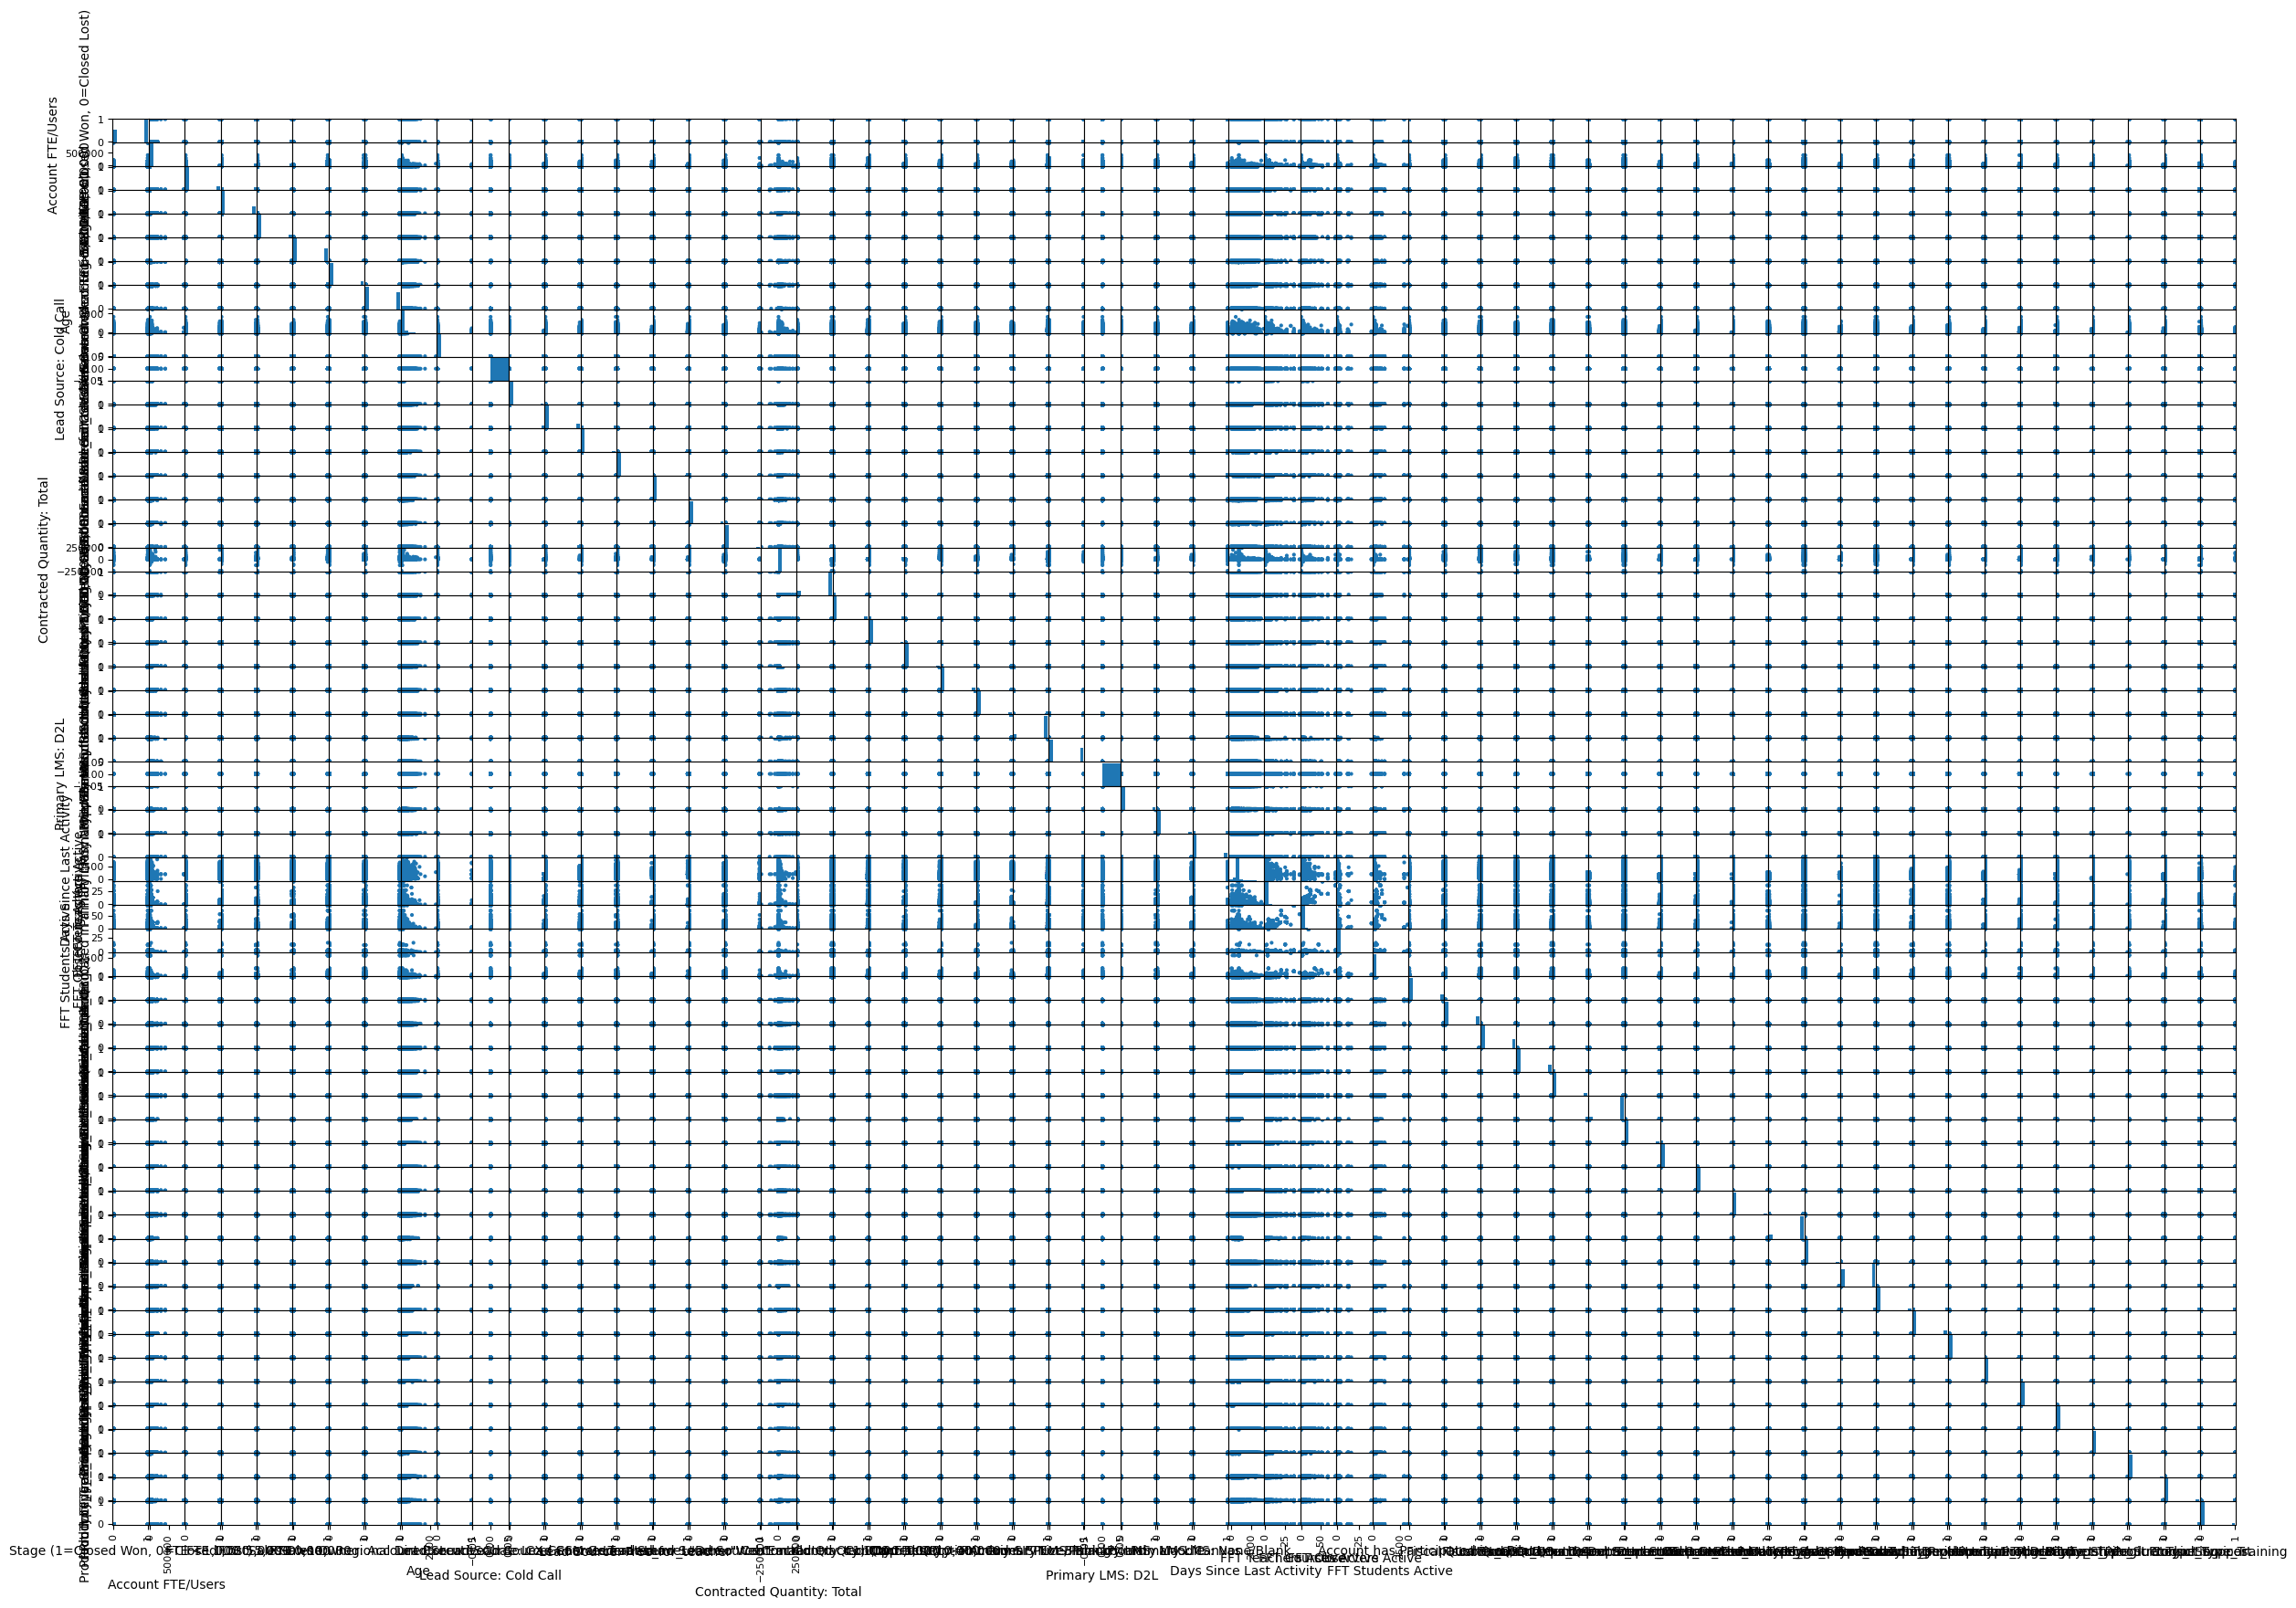

In [58]:
#bivariate visualization 
pd.plotting.scatter_matrix(df, alpha = 1, figsize = (30, 20))

plt.show()



In [59]:
#import packages for log regression
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 59 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      7576 non-null   int64  
 1   Account FTE/Users                        7576 non-null   float64
 2   FTE <1,000                               7576 non-null   int64  
 3   FTE 1,000-5,000                          7576 non-null   int64  
 4   FTE 5,000-10,000                         7576 non-null   int64  
 5   FTE >10,000                              7576 non-null   int64  
 6   Sales Owner: Regional Director           7576 non-null   int64  
 7   Sales Owner: Account Executive           7576 non-null   int64  
 8   Age                                      7576 non-null   int64  
 9   Lead Source: Chat                        7576 non-null   int64  
 10  Lead Source: Cold Call                   7576 no

In [61]:
#perform logistic regression
x= df.drop('Stage (1=Closed Won, 0=Closed Lost)', axis =1)
y= df['Stage (1=Closed Won, 0=Closed Lost)']


In [62]:
model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(multi_class='warn', random_state=0, solver='liblinear')

In [63]:
# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Stage (1=Closed Won, 0=Closed Lost)   R-squared:                       0.173
Model:                                             OLS   Adj. R-squared:                  0.167
Method:                                  Least Squares   F-statistic:                     29.17
Date:                                 Fri, 16 Dec 2022   Prob (F-statistic):          1.02e-264
Time:                                         09:04:04   Log-Likelihood:                -4425.8
No. Observations:                                 7576   AIC:                             8962.
Df Residuals:                                     7521   BIC:                             9343.
Df Model:                                           54                                         
Covariance Type:                             nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Account FTE/Users                        7.634e-08    1.4e-07      0.545      0.586   -1.98e-07    3.51e-07
FTE <1,000                                 -0.0739      0.027     -2.733      0.006      -0.127      -0.021
FTE 1,000-5,000                            -0.1058      0.028     -3.793      0.000      -0.160      -0.051
FTE 5,000-10,000                           -0.0597      0.031     -1.953      0.051      -0.120       0.000
FTE >10,000                                -0.0587      0.028     -2.060      0.039      -0.115      -0.003
Sales Owner: Regional Director             -0.0454      0.016     -2.872      0.004      -0.076      -0.014
Sales Owner: Account Executive             -0.0650      0.013     -4.993      0.000      -0.091      -0.040
Age                                        -0.0010   3.72e-05    -26.693      0.000      -0.001      -0.001
Lead Source: Chat                          -0.0061      0.089     -0.069      0.945      -0.181       0.169
Lead Source: Cold Call                  -2.069e-12   2.05e-12     -1.011      0.312   -6.08e-12    1.94e-12
Lead Source: CX Generated                   0.0367      0.102      0.359      0.720      -0.164       0.237
Lead Source: CSM Generated                 -0.1285      0.015     -8.379      0.000      -0.159      -0.098
Lead Source: Tradeshow                      0.0880      0.024      3.646      0.000       0.041       0.135
Lead Source: Free_for_teacher              -0.0105      0.047     -0.224      0.823      -0.103       0.082
Lead Source: "Demo"                         0.1301      0.051      2.546      0.011       0.030       0.230
Lead Source: "Web"                          0.0056      0.020      0.282      0.778      -0.033       0.044
Lead Source: Email                          0.0572      0.038      1.512      0.131      -0.017       0.131
Contracted Quantity: Total               3.356e-07   6.66e-07      0.504      0.614    -9.7e-07    1.64e-06
Contracted Qty <1,000                       0.2672      0.028      9.704      0.000       0.213       0.321
Contracted Qty 1,000-5,000                  0.3394      0.030     11.131      0.000       0.280       0.399
Contracted Qty 5,000-10,000                 0.2671      0.039      6.916      0.000       0.191       0.343
Contracted Qty >10,000                      0.2460      0.039      6.286      0.000       0.169       0.323
Contract Qty = Account FTE                 -0.0330      0.025     -1.312      0.190      -0.082       0.016
Opp Description Inludes "Price/Pricing"    -0.0665      0.019     -3.490      0.000     

In [64]:
#create new data frame with statistically significant pvalues
df = df[['FTE <1,000',
        'FTE 1,000-5,000',
        'FTE >10,000',
        'Sales Owner: Regional Director',
        'Sales Owner: Account Executive',
        'Age',
        'Lead Source: CSM Generated',
        'Lead Source: Tradeshow',
        'Lead Source: "Demo"',
        'Contracted Qty 1,000-5,000',
        'Contracted Qty 5,000-10,000',
        'Contracted Qty >10,000',
        'Opp Description Inludes "Price/Pricing"',
        'Primary SIS Not Blank',
        'Primary LMS: D2L', 
        'Days Since Last Activity',
        'Fiscal Quarter_Q3', 
        'Inbound/Outbound Source_Inbound',   
        'Inbound/Outbound Source_Outbound',  
        'Department Source_CS Generated', 
        'Department Source_Marketing Generated', 
        'Department Source_Sales Generated',
        'Product Type_Custom Development',  
        'Product Type_Migration',
        'Product Type_Cloud SaaS Subscription',
        'Product Type_Partnership',
        'Product Type_Strategic Services',
        'Stage (1=Closed Won, 0=Closed Lost)']]


,"FTE <1,000","FTE 1,000-5,000","FTE >10,000",Sales Owner: Regional Director,Sales Owner: Account Executive,Age,Lead Source: CSM Generated,Lead Source: Tradeshow,"Lead Source: ""Demo""","Contracted Qty 1,000-5,000",...,Inbound/Outbound Source_Outbound,Department Source_CS Generated,Department Source_Marketing Generated,Department Source_Sales Generated,Product Type_Custom Development,Product Type_Migration,Product Type_Cloud SaaS Subscription,Product Type_Partnership,Product Type_Strategic Services,"Stage (1=Closed Won, 0=Closed Lost)"
"FTE <1,000",1.000000,-0.239241,-0.321161,-0.032929,0.041382,-0.061009,0.022675,-0.045428,0.002475,-0.059241,...,0.009053,0.024138,-0.022497,-0.006805,-0.045262,-0.017184,0.014736,-0.035890,0.002475,0.007620
"FTE 1,000-5,000",-0.239241,1.000000,-0.431550,-0.021321,0.088030,0.050926,0.030925,-0.008998,-0.003869,0.149132,...,0.004729,0.043872,0.018758,-0.037176,-0.033054,0.015018,-0.002116,-0.067810,0.024097,-0.068422
"FTE >10,000",-0.321161,-0.431550,1.000000,0.044023,0.008126,0.057997,-0.028026,0.037477,0.001352,-0.061591,...,-0.001812,-0.027167,0.039484,0.017263,0.078376,0.033579,-0.028982,-0.073153,-0.006947,-0.012990
Sales Owner: Regional Director,-0.032929,-0.021321,0.044023,1.000000,-0.367865,-0.008246,-0.058755,0.045866,0.016764,0.024366,...,-0.025854,-0.020606,0.005876,0.027051,0.052688,0.050168,-0.072738,-0.022272,-0.020273,0.003674
Sales Owner: Account Executive,0.041382,0.088030,0.008126,-0.367865,1.000000,0.038265,0.124307,-0.000243,-0.035361,0.035074,...,-0.073559,0.177541,0.132651,-0.210146,0.070548,0.038042,-0.331530,-0.104103,0.056245,-0.088350
Age,-0.061009,0.050926,0.057997,-0.008246,0.038265,1.000000,0.004445,0.088364,0.029835,0.122243,...,-0.120475,-0.046446,0.205924,-0.062812,-0.017366,-0.034918,0.127262,-0.063815,-0.037297,-0.340128
Lead Source: CSM Generated,0.022675,0.030925,-0.028026,-0.058755,0.124307,0.004445,1.000000,-0.106388,-0.047149,-0.037812,...,0.105690,0.456827,-0.115263,-0.180393,-0.007282,-0.016059,0.024105,-0.059668,0.015063,-0.074815
Lead Source: Tradeshow,-0.045428,-0.008998,0.037477,0.045866,-0.000243,0.088364,-0.106388,1.000000,-0.022561,0.002524,...,-0.092149,-0.059268,0.037059,0.032944,0.006273,0.025581,-0.005425,-0.020345,-0.022561,0.015211
"Lead Source: ""Demo""",0.002475,-0.003869,0.001352,0.016764,-0.035361,0.029835,-0.047149,-0.022561,1.000000,0.005025,...,0.004664,-0.026266,-0.015725,0.037454,0.002116,-0.014874,0.022122,-0.013212,-0.009999,0.023251
"Contracted Qty 1,000-5,000",-0.059241,0.149132,-0.061591,0.024366,0.035074,0.122243,-0.037812,0.002524,0.005025,1.000000,...,-0.090382,-0.009385,0.157075,-0.083517,-0.090347,-0.037978,0.114144,-0.042093,-0.031854,-0.032530


<AxesSubplot:>

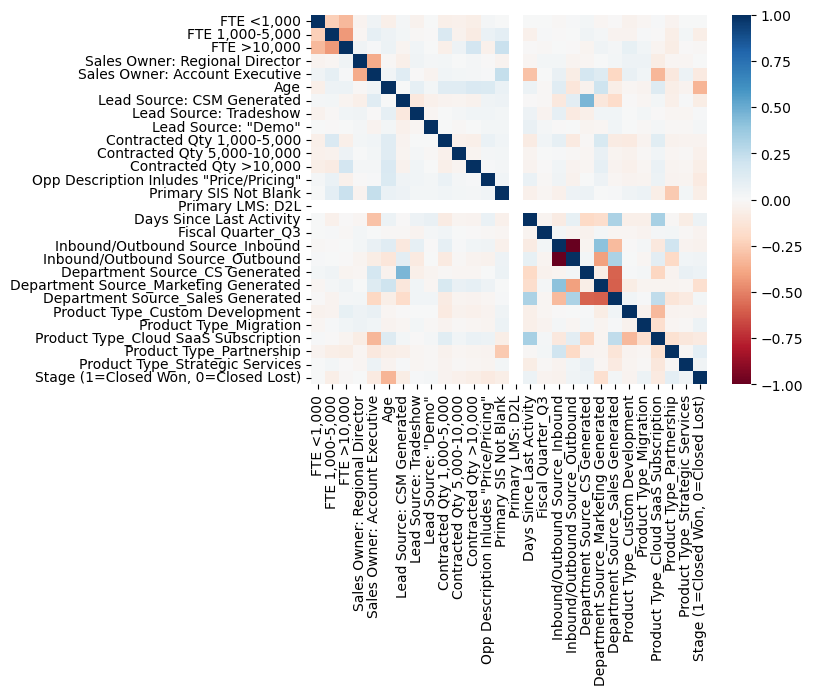

In [65]:
# test for multicolenearity 
corr = df.corr()
display(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')



In [66]:
# find VIF  
df_before = df

X1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                      0.000000
FTE <1,000                                 1.477957
FTE 1,000-5,000                            1.719397
FTE >10,000                                1.892827
Sales Owner: Regional Director             1.270409
Sales Owner: Account Executive             1.633605
Age                                        1.270690
Lead Source: CSM Generated                 1.368014
Lead Source: Tradeshow                     1.042581
Lead Source: "Demo"                        1.014108
Contracted Qty 1,000-5,000                 1.116179
Contracted Qty 5,000-10,000                1.044569
Contracted Qty >10,000                     1.090842
Opp Description Inludes "Price/Pricing"    1.044370
Primary SIS Not Blank                      1.273635
Primary LMS: D2L                                NaN
Days Since Last Activity                   1.307969
Fiscal Quarter_Q3                          1.015225
Inbound/Outbound Source_Inbound                 inf
Inbound/Outb

In [67]:
#drop Age
df_after = df.drop(['Inbound/Outbound Source_Outbound'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                      50.476840
FTE <1,000                                  1.477957
FTE 1,000-5,000                             1.719397
FTE >10,000                                 1.892827
Sales Owner: Regional Director              1.270409
Sales Owner: Account Executive              1.633605
Age                                         1.270690
Lead Source: CSM Generated                  1.368014
Lead Source: Tradeshow                      1.042581
Lead Source: "Demo"                         1.014108
Contracted Qty 1,000-5,000                  1.116179
Contracted Qty 5,000-10,000                 1.044569
Contracted Qty >10,000                      1.090842
Opp Description Inludes "Price/Pricing"     1.044370
Primary SIS Not Blank                       1.273635
Primary LMS: D2L                                 NaN
Days Since Last Activity                    1.307969
Fiscal Quarter_Q3                           1.015225
Inbound/Outbound Source_Inbound             1.

In [68]:
#drop Department Source_Sales Generated
df_after = df_after.drop(['Primary LMS: D2L'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                      50.476840
FTE <1,000                                  1.477957
FTE 1,000-5,000                             1.719397
FTE >10,000                                 1.892827
Sales Owner: Regional Director              1.270409
Sales Owner: Account Executive              1.633605
Age                                         1.270690
Lead Source: CSM Generated                  1.368014
Lead Source: Tradeshow                      1.042581
Lead Source: "Demo"                         1.014108
Contracted Qty 1,000-5,000                  1.116179
Contracted Qty 5,000-10,000                 1.044569
Contracted Qty >10,000                      1.090842
Opp Description Inludes "Price/Pricing"     1.044370
Primary SIS Not Blank                       1.273635
Days Since Last Activity                    1.307969
Fiscal Quarter_Q3                           1.015225
Inbound/Outbound Source_Inbound             1.321522
Department Source_CS Generated              3.

In [69]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [70]:
#perform logistic regression
x= df_after.drop('Stage (1=Closed Won, 0=Closed Lost)', axis =1)
y= df_after['Stage (1=Closed Won, 0=Closed Lost)']

In [71]:
model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Stage (1=Closed Won, 0=Closed Lost)   R-squared (uncentered):                   0.683
Model:                                             OLS   Adj. R-squared (uncentered):              0.682
Method:                                  Least Squares   F-statistic:                              651.1
Date:                                 Fri, 16 Dec 2022   Prob (F-statistic):                        0.00
Time:                                         09:13:29   Log-Likelihood:                         -4759.4
No. Observations:                                 7576   AIC:                                      9569.
Df Residuals:                                     7551   BIC:                                      9742.
Df Model:                                           25                                                  
Covariance Type:                             nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
FTE <1,000                                  0.0318      0.018      1.816      0.069      -0.003       0.066
FTE 1,000-5,000                            -0.0085      0.016     -0.537      0.591      -0.039       0.022
FTE >10,000                                 0.0291      0.015      1.970      0.049       0.000       0.058
Sales Owner: Regional Director              0.0111      0.016      0.689      0.491      -0.021       0.043
Sales Owner: Account Executive             -0.0005      0.013     -0.041      0.968      -0.026       0.025
Age                                        -0.0010   3.86e-05    -26.531      0.000      -0.001      -0.001
Lead Source: CSM Generated                 -0.1454      0.016     -9.239      0.000      -0.176      -0.115
Lead Source: Tradeshow                      0.0735      0.025      2.966      0.003       0.025       0.122
Lead Source: "Demo"                         0.0996      0.053      1.878      0.060      -0.004       0.204
Contracted Qty 1,000-5,000                  0.0794      0.019      4.171      0.000       0.042       0.117
Contracted Qty 5,000-10,000                 0.0212      0.036      0.592      0.554      -0.049       0.091
Contracted Qty >10,000                     -0.0041      0.030     -0.136      0.892      -0.063       0.055
Opp Description Inludes "Price/Pricing"    -0.0721      0.020     -3.635      0.000      -0.111      -0.033
Primary SIS Not Blank                       0.0866      0.016      5.353      0.000       0.055       0.118
Days Since Last Activity                    0.0001   1.13e-05     13.147      0.000       0.000       0.000
Fiscal Quarter_Q3                           0.0053      0.012      0.455      0.649      -0.017       0.028
Inbound/Outbound Source_Inbound             0.0608      0.021      2.962      0.003       0.021       0.101
Department Source_CS Generated              0.7541      0.029     25.679      0.000       0.697       0.812
Department Source_Marketing Generated       0.3491      0.029     11.835      0.000       0.291       0.407
Department Source_Sales Generated           0.5234      0.020     26.385      0.000       0.485       0.562
Product Type_Custom Development            -0.0467      0.022     -2.164      0.031      -0.089      -0.004
Product Type_Migration                      0.1702      0.037      4.614      0.000       0.098       0.243
Product Type_Cloud SaaS Subscription       -0.0275      0.014     -2.030      0.042      -0.054  